In [1]:
from rossby_waves import *
from math import floor
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_autocor
from matplotlib.animation import FuncAnimation, PillowWriter

In [16]:
with open("0.001.bin", 'rb') as f:
    data = np.array(pickle.load(f))

xdata1 = data[0,:,0]
xdata2 = data[0,:,200]
ydata1 = data[1,:,0]
ydata2 = data[1,:,200]

(10000,)

We want to calculate velocity autocorrelation. Function for that is $\psi(t) =\frac{1}{N} \sum_{i=1} ^N \frac{v_i(t) \cdot v_i(0)}{v_i^2} $. 

In [2]:
#Our Rossby and Ocean used in all models
#ro is RossbyOcean of grid of Rossbywaves, should be periodic
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves()
ro.remove_wave(0)
x = grid(100)

In [3]:
y = vel_autocor(ro,x,2e12,2e13)


KeyboardInterrupt: 

In [4]:
print(y)

474.7128532828287


Purely rotational flow (eps = 1)


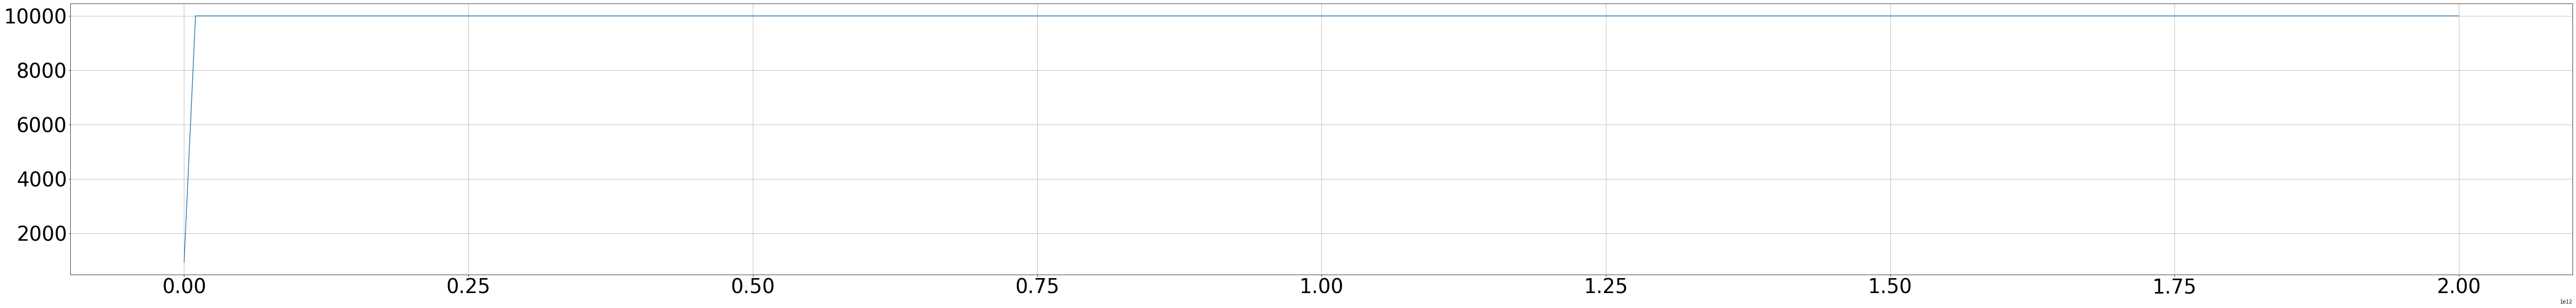

In [11]:
t = np.linspace(0.001, 2e12,200)
arr = []
for i in range(200):
    arr.append(vel_autocor(ro, x, t[i-1], t[i], e=1))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('vaf1.png')

Purely irrotational flow (eps = 0)

In [12]:
t = np.linspace(0.001, 2e12,200)
arr = []
for i in range(200):
    arr.append(vel_autocor(ro, x, t[i-1], t[i], e=0))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('vaf0.png')

weak Rotational flow (eps = 0.01)

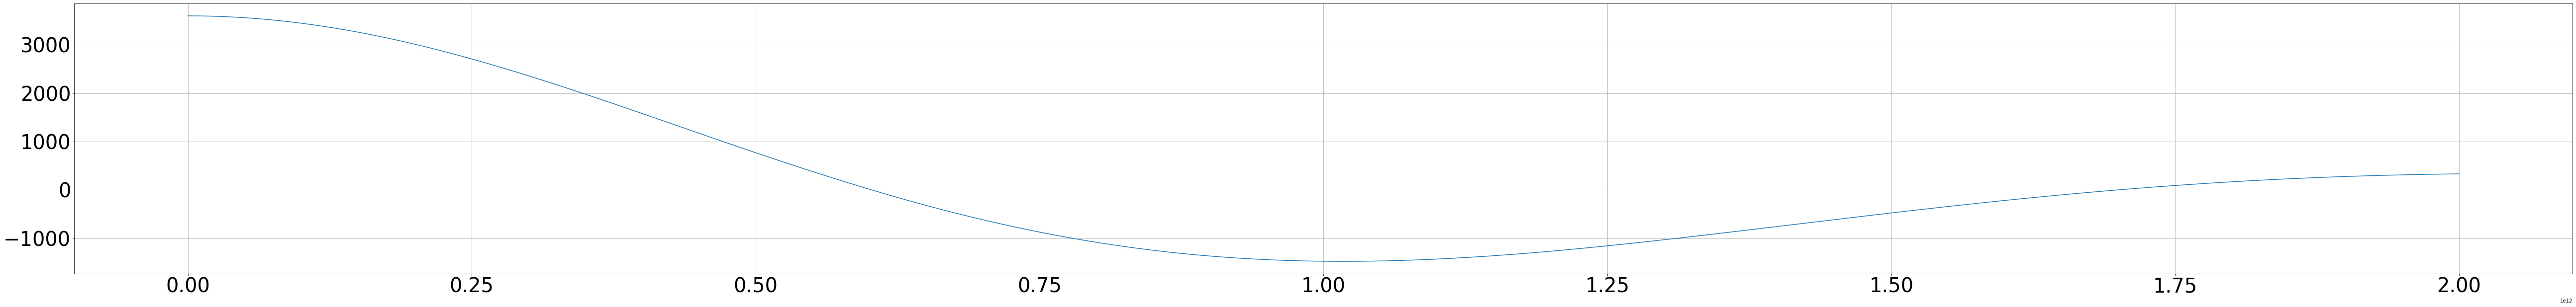

In [34]:
t = np.linspace(0.01, 0.05,200)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=0.01))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show

plt.savefig('vaf0.9.png')

Extremely Weak Rotational Flow (eps = 0.001)

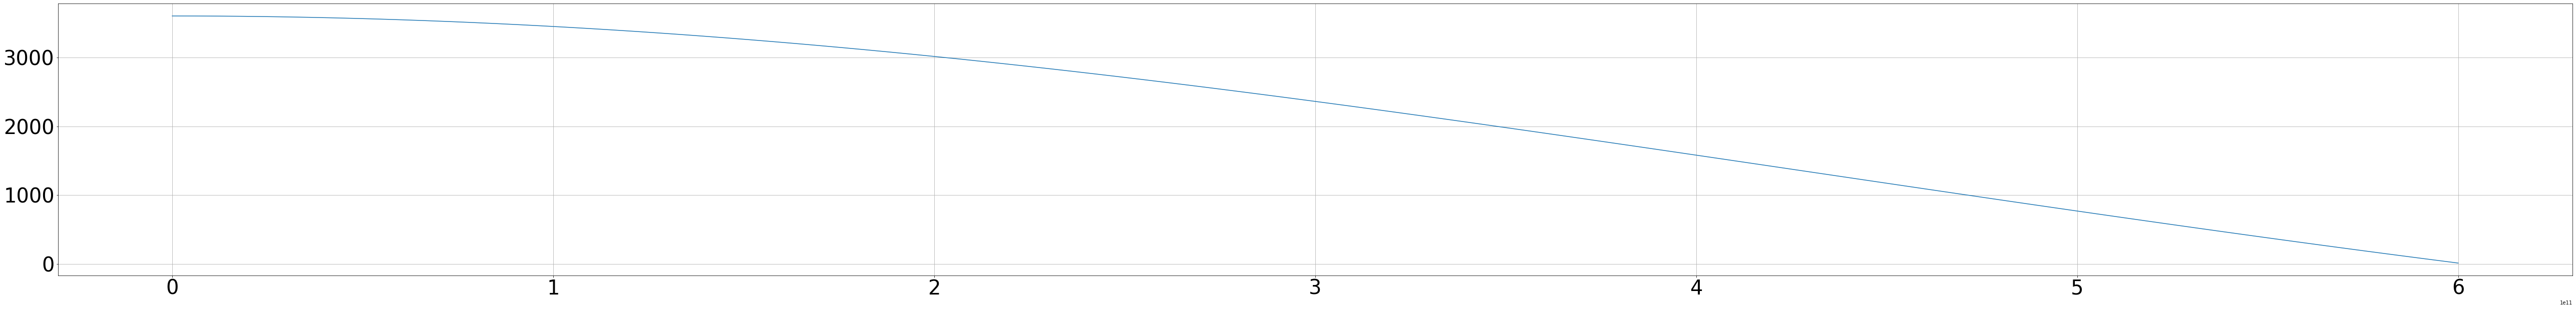

In [35]:
t = np.linspace(1, 0.6e12,100)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=0.001))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show

plt.savefig('vaf0.9999.png')